In [1]:
# Try to load CyberGIS-Compute client
try:
    from cybergis_compute_client import CyberGISCompute
    
# If not already setup, setup CyberGIS-Compute in the current Jupyter kernel
except:
    import sys
    !{sys.executable} -m pip install git+https://github.com/cybergis/job-supervisor-python-sdk.git@v2
    
    from cybergis_compute_client import CyberGISCompute

In [2]:
# Create CyberGIS-Compute object
cybergis = CyberGISCompute(url="cgjobsup-dev.cigi.illinois.edu", 
                           port=3030, protocol='HTTP', isJupyter=True)

In [3]:
# Review CyberGIS-Compute resources
cybergis.list_hpc()
cybergis.list_maintainer()
cybergis.list_git()

hpc,ip,port,is_community_account
keeling_community,keeling.earth.illinois.edu,22,True
bridges_community,bridges2.psc.edu,22,True
hadoop,hadoop01.cigi.illinois.edu,50022,False


maintainer,hpc,default_hpc,job_pool_capacity,executable_folder->from_user,executable_folder->must_have
hello_world_singularity,['keeling_community'],keeling_community,5,False,not specified
community_contribution,"['keeling_community', 'bridges_community']",keeling_community,5,True,not specified


link,name,container,repository,commit
git://uncertainty_in_spatial_accessibility,Uncertainty_in_Spatial_Accessibility,cybergisx-0.4,https://github.com/JinwooParkGeographer/Uncertainty-in-Spatial-Accessibility.git,
git://spatial_access_covid-19,COVID-19 spatial accessibility,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-spatial-access-covid-19.git,
git://hello_world,hello world,python,https://github.com/cybergis/cybergis-compute-hello-world.git,
git://fireabm,hello FireABM,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-fireabm.git,
git://data_fusion,data fusion,python,https://github.com/CarnivalBug/data_fusion.git,
git://cybergis-compute-modules-test,modules test,cjw-eb,https://github.com/alexandermichels/cybergis-compute-modules-test.git,
git://bridge_hello_world,hello world,python,https://github.com/cybergis/CyberGIS-Compute-Bridges-2.git,


In [4]:
# Create job, set GitHub repo, and submit job

slurm = {
    "cpu_per_task": 4,
    "walltime": "60:00",
}

demo_job = cybergis.create_job('community_contribution')
demo_job.set(executableFolder="git://uncertainty_in_spatial_accessibility", slurm=slurm)
demo_job.submit()

📃 created constructor file [job_constructor_1631741634G0qUz.json]
{'param': {}, 'env': {}, 'slurm': {'cpu_per_task': 4, 'walltime': '60:00'}, 'executableFolder': 'git://uncertainty_in_spatial_accessibility'}
✅ job submitted


id,maintainer,hpc,executableFolder,dataFolder,resultFolder,param,slurm,createdAt
1631741634G0qUz,community_contribution,keeling_community,git://uncertainty_in_spatial_accessibility,,,{},"{""cpu_per_task"": 4, ""walltime"": ""60:00""}",2021-09-15T16:33:53.000Z


In [5]:
# View job events
demo_job.events(liveOutput=True)

📮 Job ID: 1631741634G0qUz
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


types,message,time
JOB_QUEUED,"job [1631741634G0qUz] is queued, waiting for registration",2021-09-15T16:33:54.000Z
JOB_REGISTERED,"job [1631741634G0qUz] is registered with the supervisor, waiting for initialization",2021-09-15T16:33:56.000Z
SLURM_UPLOAD,uploading files,2021-09-15T16:34:11.000Z
SSH_UNZIP,unzipping /data/keeling/a/cigi-gisolve/scratch/dev/1631741634G0qUz/executable.zip to /data/keeling/a/cigi-gisolve/scratch/dev/1631741634G0qUz/executable,2021-09-15T16:34:11.000Z
SSH_RM,removing /data/keeling/a/cigi-gisolve/scratch/dev/1631741634G0qUz/executable.zip,2021-09-15T16:34:11.000Z
SSH_CREATE_FILE,create file to /data/keeling/a/cigi-gisolve/scratch/dev/1631741634G0qUz/executable/job.json,2021-09-15T16:34:11.000Z
SLURM_SUBMIT,submitting slurm job,2021-09-15T16:34:11.000Z
SLURM_SUBMIT_SUCCESS,slurm job submitted with slurm job id 422011,2021-09-15T16:34:11.000Z
SLURM_MKDIR_RESULT,creating result folder,2021-09-15T16:34:11.000Z
JOB_INIT,"job [1631741634G0qUz] is initialized, waiting for job completion",2021-09-15T16:34:11.000Z


In [6]:
# View job logs
demo_job.logs(liveOutput=True)

📮 Job ID: 1631741634G0qUz
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


message,time
running setup Removed 1321 nodes (0.0288%) from the OSMNX network Number of nodes: 45939 Number of edges: 70698 Removed 1321 nodes (0.0288%) from the OSMNX network Number of nodes: 45939 Number of edges: 70698 Removed 1321 nodes (0.0288%) from the OSMNX network Number of nodes: 45939 Number of edges: 70698 Removed 1321 nodes (0.0288%) from the OSMNX network Number of nodes: 45939 Number of edges: 70698 Removed 1321 nodes (0.0288%) from the OSMNX network Number of nodes: 45939 Number of edges: 70...[download for full log],2021-09-15T16:42:00.000Z
"(sample_code.py:21743): Gdk-CRITICAL **: 16:34:18.858: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed 0%| | 0/60493 [00:00<?, ?it/s] 0%| | 1/60493 [00:00<3:54:47, 4.29it/s] 1%| | 307/60493 [00:00<2:43:37, 6.13it/s] 1%| | 615/60493 [00:00<1:54:02, 8.75it/s] 2%|▏ | 923/60493 [00:00<1:19:31, 12.49it/s] 2%|▏ | 1227/60493 [00:00<55:28, 17.81it/s] 3%|▎ | 1534/60493 [00:00<38:43, 25.37it/s] 3%|▎ ...[download for full log]",2021-09-15T16:42:00.000Z


In [7]:
# create results folder to store downloaded results
import os
if not os.path.isdir("accessibility_results/access_result/"):
    os.makedirs("accessibility_results/access_result/")

In [8]:
# Save results to zip
result_zip = demo_job.downloadResultFolder('./accessibility_results')

file successfully downloaded under: ./accessibility_results/1631741637LTT9.zip


In [9]:
# Extract results
import zipfile
extract_results_to = "accessibility_results/access_result/"
with zipfile.ZipFile(result_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_results_to)

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

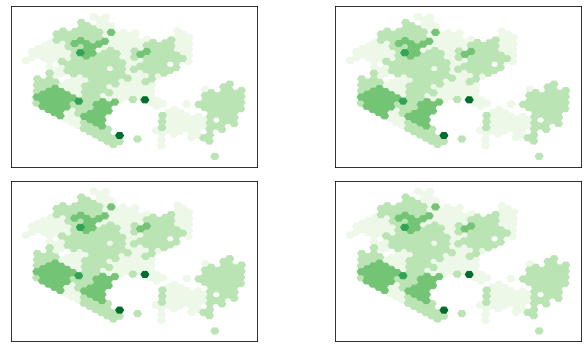

In [11]:
plt_cls = [0, 5, 10, 15, 20, 25]
colors = ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c']

extract_results_to = "accessibility_results/access_result/"

fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    temp_result = gpd.read_file(os.path.join(extract_results_to, f'iter_{i}', 'demand.geojson'))
    
    for idx, cls in enumerate(plt_cls):
        if idx == 0: continue
        temp_cls = temp_result.loc[(plt_cls[idx-1] < temp_result[f'step2']) & (temp_result[f'step2'] <= cls)]
        if temp_cls.shape[0] > 0:
            temp_cls.plot(ax=ax, color=colors[idx-1], edgecolor=colors[idx-1])
            
plt.tight_layout()
plt.show()